In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
# Log dosyasını yükleyin
log_file_path = '../data/logfiles.log'

# Dosyayı okuyup satırları liste olarak alın
with open(log_file_path, 'r') as file:
    logs = file.readlines()

# Her bir log girdisini düzenli ifadelerle ayrıştırmak için bir fonksiyon
def parse_log_entry(log_entry):
    pattern = r'(\S+) - - \[(.*?)\] "(.*?)" (\d{3}) (\d+) "(.*?)" "(.*?)" (\d+)'
    match = re.match(pattern, log_entry)
    if match:
        return match.groups()
    return None

# Log girdilerini ayrıştırın ve bir DataFrame oluşturun
parsed_logs = [parse_log_entry(log) for log in logs]
columns = ['IP', 'Timestamp', 'Request', 'Status_Code', 'Bytes', 'Referrer', 'User_Agent', 'Response_Time']
df = pd.DataFrame(parsed_logs, columns=columns)

# Zaman damgasını datetime formatına çevirin
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

# DataFrame'i bir CSV dosyasına kaydedin
csv_file_path = '../data/logfiles.csv'
df.to_csv(csv_file_path, index=False)

print(f"CSV dosyası '{csv_file_path}' konumuna kaydedildi.")

CSV dosyası '../data/logfiles.csv' konumuna kaydedildi.


In [52]:
clean_df = pd.read_csv('..\data\cleaned_logfiles.csv')
clean_df

,IP,Timestamp,Request,Status_Code,Bytes,Response_Time
0,233.223.117.90,2037-12-27 12:00:00+05:30,DELETE usradmin HTTP10,502,4963,45
1,162.253.4.179,2037-12-27 12:00:00+05:30,GET usradmindeveloper HTTP10,200,5041,3885
2,252.156.232.172,2037-12-27 12:00:00+05:30,POST usrregister HTTP10,404,5028,3350
3,182.215.249.159,2037-12-27 12:00:00+05:30,PUT usrregister HTTP10,304,4936,767
4,160.36.208.51,2037-12-27 12:00:00+05:30,POST usr HTTP10,304,4979,84
...,...,...,...,...,...,...
996100,203.210.144.42,2037-12-27 12:00:00+05:30,DELETE usradmin HTTP10,303,5022,4451
996101,16.52.128.114,2037-12-27 12:00:00+05:30,PUT usradmindeveloper HTTP10,500,5013,3272
996102,181.186.85.10,2037-12-27 12:00:00+05:30,DELETE usrlogin HTTP10,500,4941,945
996103,4.72.20.141,2037-12-27 12:00:00+05:30,POST usr HTTP10,500,4998,830


In [53]:
clean_df['Timestamp'] = pd.to_datetime(clean_df['Timestamp'])

In [54]:
clean_df.describe()

,Status_Code,Bytes,Response_Time
count,996105.000000,996105.000000,996105.000000
mean,373.845583,4999.486023,2500.498849
std,102.968846,50.043077,1442.443551
min,200.000000,4763.000000,1.000000
25%,303.000000,4966.000000,1253.000000
50%,403.000000,5000.000000,2501.000000
75%,500.000000,5033.000000,3749.000000
max,502.000000,5233.000000,5000.000000


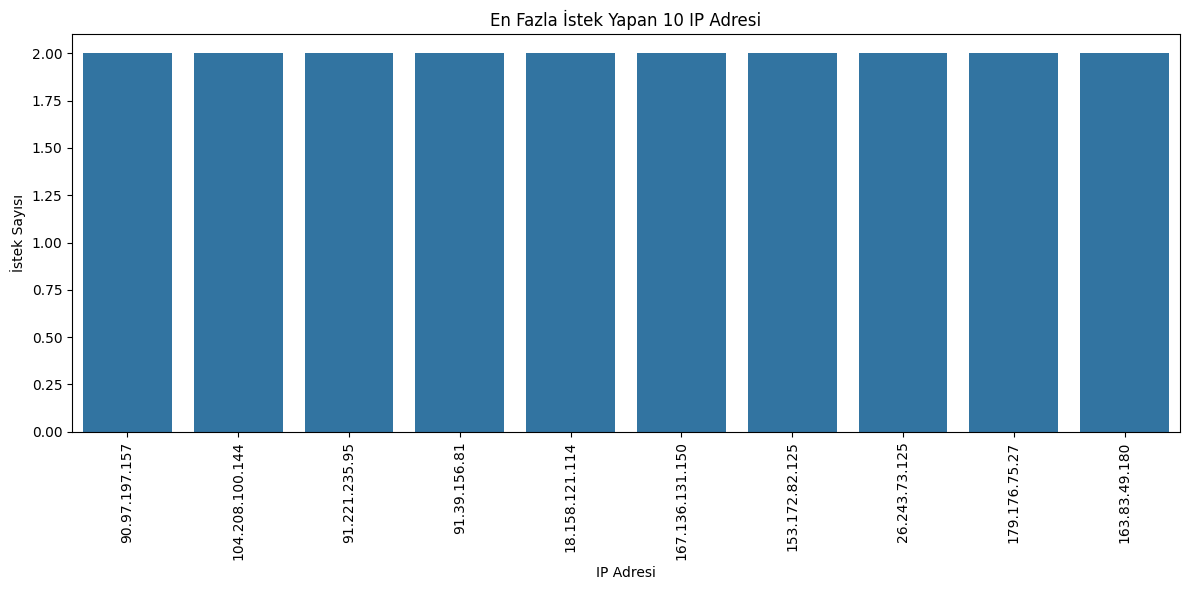

In [55]:
# IP adreslerini sıklıklarına göre sıralayıp en yüksek 10 tanesini seçin
top_ips = clean_df['IP'].value_counts().nlargest(10).index
filtered_df = clean_df[clean_df['IP'].isin(top_ips)]

# IP'ye göre istek sayısını gösteren bar grafiği
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='IP', order=top_ips)
plt.xticks(rotation=90)
plt.title('En Fazla İstek Yapan 10 IP Adresi')
plt.xlabel('IP Adresi')
plt.ylabel('İstek Sayısı')
plt.tight_layout()
plt.show()

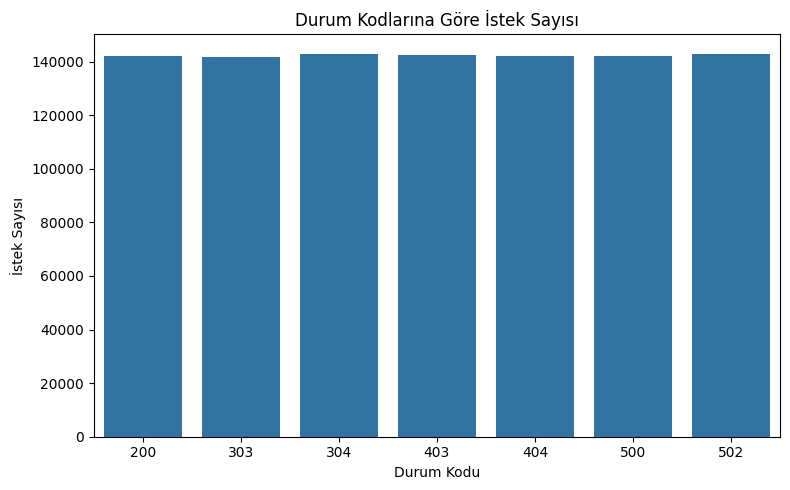

In [56]:
# Durum kodlarına göre istek sayısını gösteren bar grafiği
plt.figure(figsize=(8, 5))
sns.countplot(data=clean_df, x='Status_Code')
plt.title('Durum Kodlarına Göre İstek Sayısı')
plt.xlabel('Durum Kodu')
plt.ylabel('İstek Sayısı')
plt.tight_layout()
plt.show()

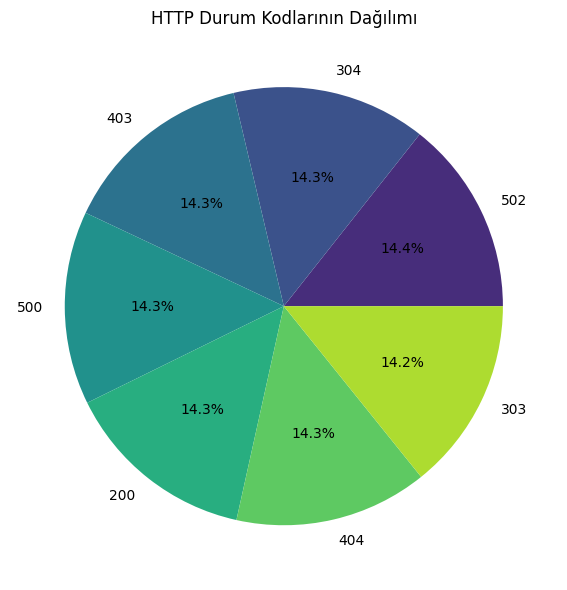

In [57]:
# Status kodlarının dağılımını hesapla
status_counts = clean_df['Status_Code'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(10, 6))
status_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(status_counts)))
plt.title('HTTP Durum Kodlarının Dağılımı')
plt.ylabel('')
plt.tight_layout()
plt.show()

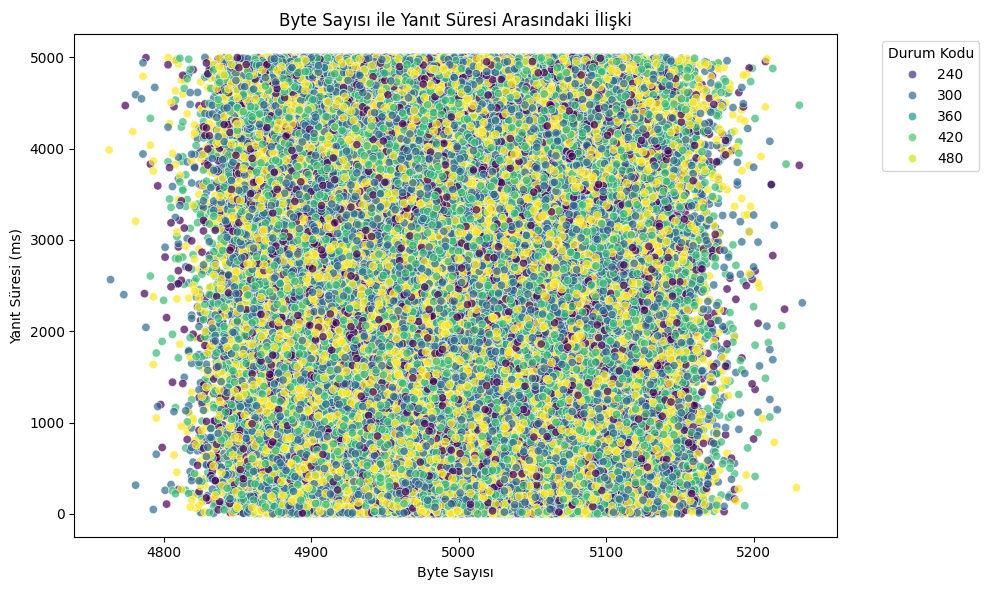

In [58]:
# Byte sayısı ile yanıt süresi arasındaki ilişkiyi gösteren dağılım grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='Bytes', y='Response_Time', hue='Status_Code', palette='viridis', alpha=0.7)

plt.title('Byte Sayısı ile Yanıt Süresi Arasındaki İlişki')
plt.xlabel('Byte Sayısı')
plt.ylabel('Yanıt Süresi (ms)')
plt.legend(title='Durum Kodu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [59]:
# 'Request' sütunundaki eşsiz değerleri çıkart
clean_df['Request_Type'] = clean_df['Request'].str.extract(r'(\w+)')

# Eşsiz zaman değerlerini kontrol et
unique_requests = clean_df['Request_Type'].value_counts()
print(unique_requests)

Request_Type
PUT       249756
GET       249569
DELETE    248786
POST      247994
Name: count, dtype: int64


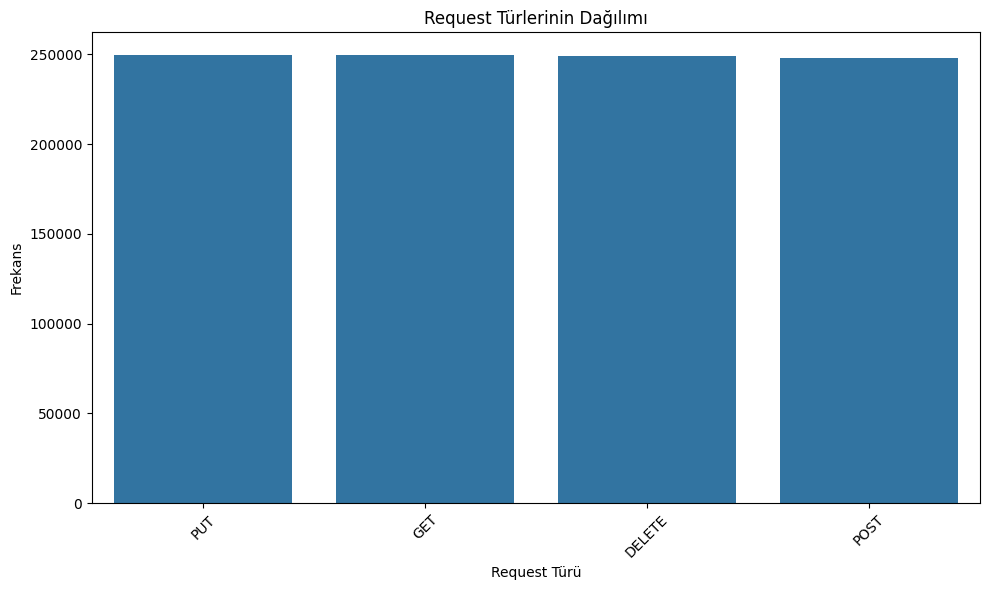

In [60]:
# Eşsiz zaman değerlerinin sayısını bar grafiği ile göster
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='Request_Type', order=clean_df['Request_Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Request Türlerinin Dağılımı')
plt.xlabel('Request Türü')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

In [61]:
# Sütun isimlerini kontrol edin
print(clean_df.columns)

Index(['IP', 'Timestamp', 'Request', 'Status_Code', 'Bytes', 'Response_Time',
       'Request_Type'],
      dtype='object')


In [62]:
print(df['Timestamp'].unique())

<DatetimeArray>
['2037-12-27 12:00:00+05:30']
Length: 1, dtype: datetime64[ns, UTC+05:30]


In [65]:
# Simüle edilmiş zaman damgaları ekleyin
num_entries = len(clean_df)
start_date = pd.to_datetime('2023-01-01')

# Veri çerçevesine rastgele zaman damgaları ekleyin
clean_df['Timestamp'] = [start_date + pd.DateOffset(days=np.random.randint(0, 30)) for _ in range(num_entries)]

# Şimdi tekrar kontrol edin
print(clean_df['Timestamp'].unique())

<DatetimeArray>
['2023-01-05 00:00:00', '2023-01-10 00:00:00', '2023-01-21 00:00:00',
 '2023-01-12 00:00:00', '2023-01-22 00:00:00', '2023-01-09 00:00:00',
 '2023-01-24 00:00:00', '2023-01-07 00:00:00', '2023-01-30 00:00:00',
 '2023-01-03 00:00:00', '2023-01-13 00:00:00', '2023-01-01 00:00:00',
 '2023-01-04 00:00:00', '2023-01-19 00:00:00', '2023-01-08 00:00:00',
 '2023-01-27 00:00:00', '2023-01-11 00:00:00', '2023-01-26 00:00:00',
 '2023-01-29 00:00:00', '2023-01-15 00:00:00', '2023-01-17 00:00:00',
 '2023-01-20 00:00:00', '2023-01-23 00:00:00', '2023-01-16 00:00:00',
 '2023-01-28 00:00:00', '2023-01-25 00:00:00', '2023-01-06 00:00:00',
 '2023-01-02 00:00:00', '2023-01-14 00:00:00', '2023-01-18 00:00:00']
Length: 30, dtype: datetime64[ns]


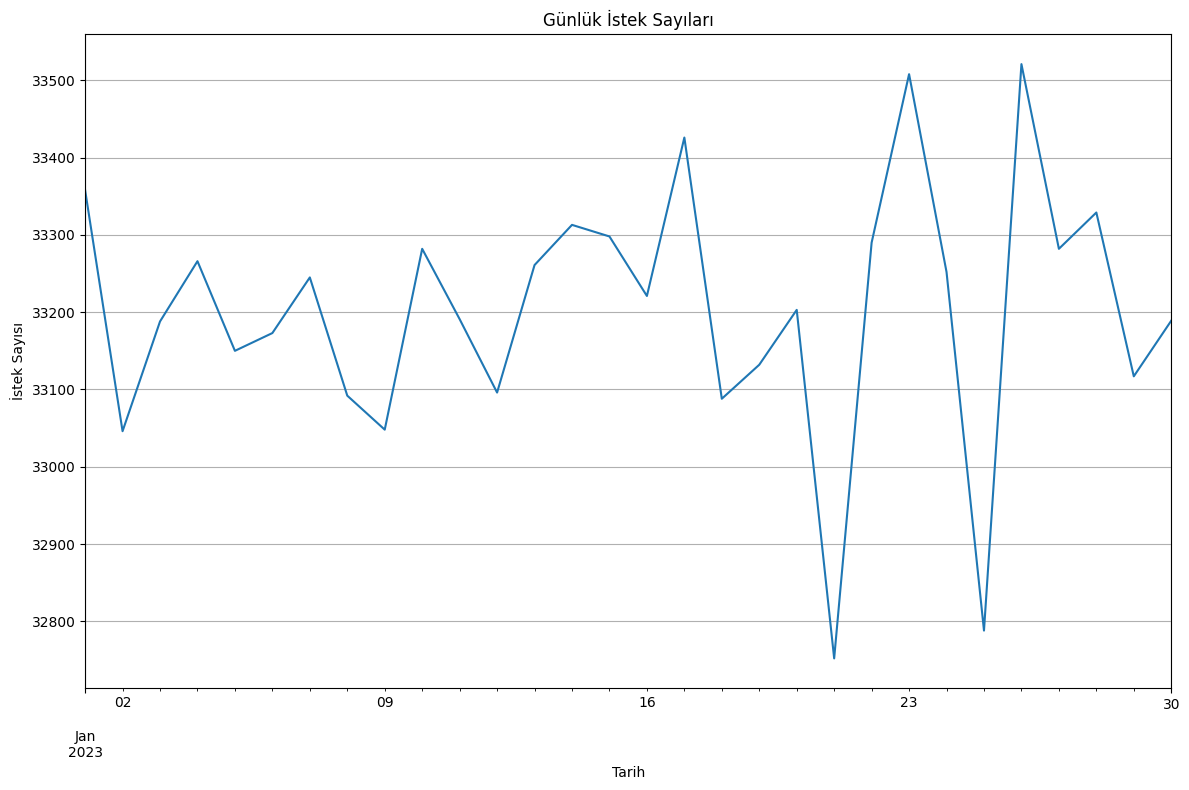

In [66]:
# Veriyi yeniden set index yapın
clean_df.set_index('Timestamp', inplace=True)

# Günlük istek sayılarını hesapla
daily_requests = clean_df.resample('D').size()

# Günlük istek sayılarını gösteren zaman serisi grafiği
plt.figure(figsize=(12, 8))
daily_requests.plot()
plt.title('Günlük İstek Sayıları')
plt.xlabel('Tarih')
plt.ylabel('İstek Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()